# CA-04 Ensemble Models

---
### Name: Alena Sanchez
### Course: Intro to Machine Learning (BSAN 6070)
### Professor: Arin Brahma


---



# 1. Data Source and Contents

In [279]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from io import StringIO
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from pandas.core.common import random_state
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import re

In [280]:
url = "https://github.com/ArinB/MSBA-CA-Data/blob/main/CA03/census_data.csv?raw=true"
data = pd.read_csv(url, encoding = "ISO-8859-1") 

## *Data Quality Analysis (DQA)*

In [281]:
data.shape

(48842, 11)

In [282]:
data.columns

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin', 'flag', 'y'],
      dtype='object')

In [283]:
data.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [284]:
data.tail()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0
48841,e. 51-60,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,c. 31-35 & 61-70,test,1


In [285]:
data.describe()

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [286]:
data.describe(include='object')

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,5,5,3,3,3,5,5,2,5,2
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561


##*SPLITTING AND ENCODING for MODELS*

In [287]:
#splitting data into test and training datasets and preparing it to be put into model.

TRAIN = data[data['flag']=='train']
TEST = data[data['flag']=='test']

In [288]:
TRAIN.head()
TRAIN.shape
#32561 training records

(32561, 11)

In [289]:
TEST.head()
TEST.shape
#16281 test records

(16281, 11)

In [290]:
x_train = pd.get_dummies(TRAIN[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin']],drop_first=True)
y_train= TRAIN['y'].copy()

In [291]:
x_test = pd.get_dummies(TEST[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin']],drop_first=True)
y_test = TEST['y'].copy()

# 2. Finding Optimal Value of a Key Hyper-Parameter

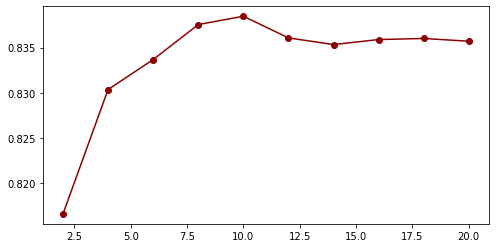

In [292]:
results = []
max_depth_options = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

for trees in max_depth_options:
  model = DecisionTreeClassifier(max_depth=trees, random_state=101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred", marker="o")

#3. Building a Random Forest Model

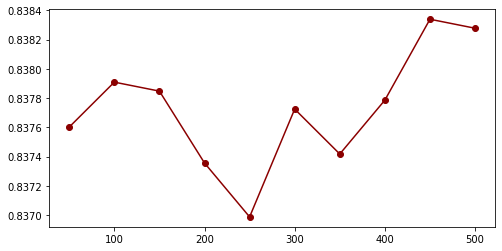

In [294]:
results = []
num_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in num_estimators:
  model = RandomForestClassifier(n_estimators=trees, random_state=101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, num_estimators).plot(color="darkred", marker="o")

#4. Building AdaBoost, Gradient Boost (classifier), and XGB Model

## AdaBoost Model

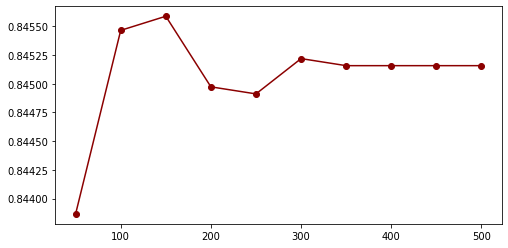

In [295]:
results = []
num_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in num_estimators:
  model = AdaBoostClassifier(n_estimators=trees, random_state=101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, num_estimators).plot(color="darkred", marker="o")

## Gradient Boost Model

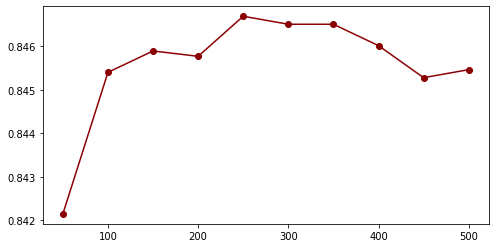

In [296]:
results = []
num_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in num_estimators:
  model = GradientBoostingClassifier(n_estimators=trees, random_state=101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, num_estimators).plot(color="darkred", marker="o")

## XGB Model

In [297]:
#had to remove various characters from the feature names as the XGBClassifier does not run with certain characters in the feature names! 
#kept getting this error when trying to run model: ValueError('feature_names may not contain [, ] or <')

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

x_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<', '>'))) else col for col in x_train.columns.values]

x_train_new = x_train.iloc[:]


x_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<', '>'))) else col for col in x_test.columns.values]

x_test_new = x_test.iloc[:]

#https://stackoverflow.com/questions/48645846/pythons-xgoost-valueerrorfeature-names-may-not-contain-or

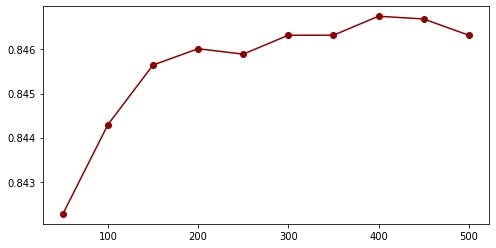

In [298]:
results = []
num_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in num_estimators:
  model = XGBClassifier(n_estimators=trees, random_state=101)
  model.fit(x_train_new, y_train)
  y_pred = model.predict(x_test_new)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, num_estimators).plot(color="darkred", marker="o")

#5. Compare Performance

In [299]:
#Random Forest
modelRF = RandomForestClassifier(n_estimators=312, random_state=101)
modelRF.fit(x_train, y_train)
y_pred = modelRF.predict(x_test)

accRF = accuracy_score(y_test, y_pred)
aucRF = roc_auc_score(y_test,y_pred)

In [300]:
#AdaBoost
modelADA = AdaBoostClassifier(n_estimators=312, random_state=101)
modelADA.fit(x_train, y_train)
y_pred = modelADA.predict(x_test)

accADA = accuracy_score(y_test, y_pred)
aucADA = roc_auc_score(y_test,y_pred)

In [301]:
#GradientBoosting
modelGR = GradientBoostingClassifier(n_estimators=312, random_state=101)
modelGR.fit(x_train, y_train)
y_pred = modelGR.predict(x_test)

accGR = accuracy_score(y_test, y_pred)
aucGR = roc_auc_score(y_test,y_pred)

In [302]:
#XGBoost
modelXGB = XGBClassifier(n_estimators=312, random_state=101)
modelXGB.fit(x_train_new, y_train)
y_pred = modelXGB.predict(x_test_new)

accXGB = accuracy_score(y_test, y_pred)
aucXGB = roc_auc_score(y_test,y_pred)

In [309]:
dictionary = {'RandomForest': [accRF, aucRF], 'AdaBoost': [accADA, aucADA], 'GradientBoosting': [accGR, aucGR], 'XGBoost': [accXGB, aucXGB]}
performance = pd.DataFrame(data=dictionary, index = ["Accuracy", "AUC"])
performance

performance.style.set_caption("Common Hyperparameters: n_estimators = 312 & random_state = 101")

,RandomForest,AdaBoost,GradientBoosting,XGBoost
Accuracy,0.838278,0.845157,0.846385,0.846017
AUC,0.747043,0.746518,0.757290,0.756869
